For this task we'll use the same Unemployment dataset, and we'll split the data into 185 training records and 61 testing records. Then we'll evaluate the performance of the model.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
# Load data 
from google.colab import files
uploaded = files.upload()

Saving UNRATENSA.csv to UNRATENSA.csv


In [3]:
# Dataset is now stored in a Pandas Dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded["UNRATENSA.csv"]),index_col="DATE",parse_dates=True)

In [5]:
# Change the column name 
df.columns = ["Unemployment"]

In [6]:
df.head()

,Unemployment
DATE,
2000-01-01,4.5
2000-02-01,4.4
2000-03-01,4.3
2000-04-01,3.7
2000-05-01,3.8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2000-01-01 to 2020-06-01
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unemployment  246 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


In [8]:
df.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01'],
              dtype='datetime64[ns]', name='DATE', length=246, freq=None)

In [9]:
# Setting a DatetimeIndex Frequency
df.index.freq = "MS"

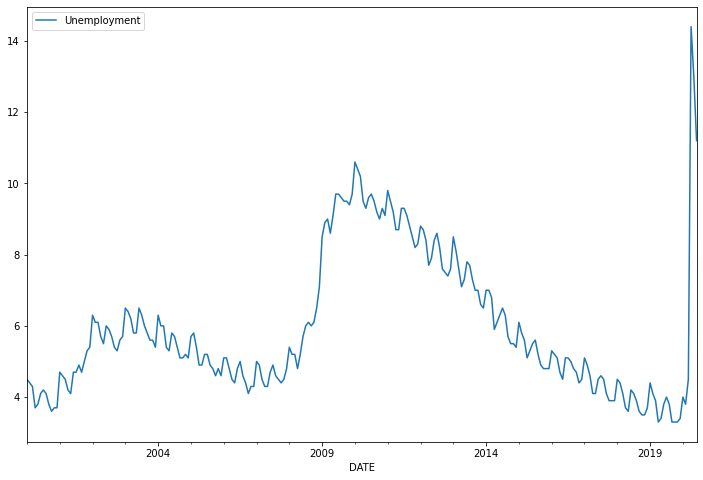

In [10]:
# Plotting
df.plot(figsize=(12,8));

In [12]:
# Train and Test Split
train = df.iloc[:185]
test = df.iloc[185:]

In [13]:
len(test)

61

In [14]:
len(train)

185

In [15]:
# Fitting the Model
fitted_model = ExponentialSmoothing(train["Unemployment"],trend="mul",seasonal="mul",seasonal_periods=12).fit()

In [16]:
# Forecast
test_predictions = fitted_model.forecast(61).rename("Forecast")

In [17]:
test_predictions

2015-06-01    5.472755
2015-07-01    5.493291
2015-08-01    5.237187
2015-09-01    4.917058
2015-10-01    4.832468
                ...   
2020-02-01    3.056355
2020-03-01    2.951822
2020-04-01    2.691522
2020-05-01    2.745284
2020-06-01    2.848078
Freq: MS, Name: Forecast, Length: 61, dtype: float64

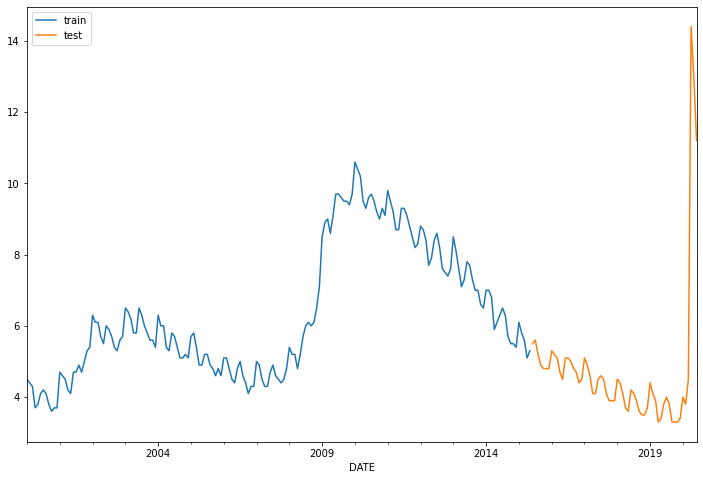

In [18]:
# Plotting
train["Unemployment"].plot(legend=True,label="train")
test["Unemployment"].plot(legend=True,label="test",figsize=(12,8));

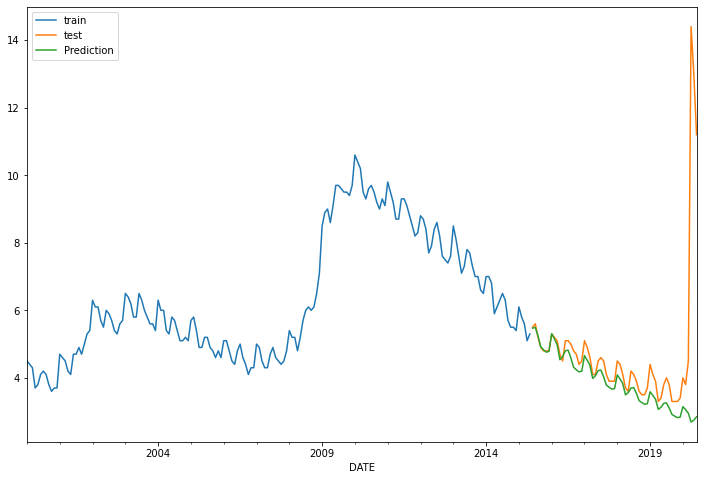

In [20]:
train["Unemployment"].plot(legend=True,label="train")
test["Unemployment"].plot(legend=True,label="test",figsize=(12,8))
test_predictions.plot(legend=True,label="Prediction");

### **Evaluation Metrics**

In [21]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [22]:
# Mean Absolute Error
mean_absolute_error(test,test_predictions)

0.8214620393375232

In [23]:
# Mean Squared Error
mean_squared_error(test,test_predictions)

5.292773405418118

In [24]:
# Root Mean Squared Error
np.sqrt(mean_squared_error(test,test_predictions))

2.300602835219091

### **Forecasting into Future**

In [26]:
# For this task we need fit all dataset
future_model = ExponentialSmoothing(df["Unemployment"],trend="mul",seasonal="mul",seasonal_periods=12).fit()

In [27]:
forecast_predictions = future_model.forecast(61)

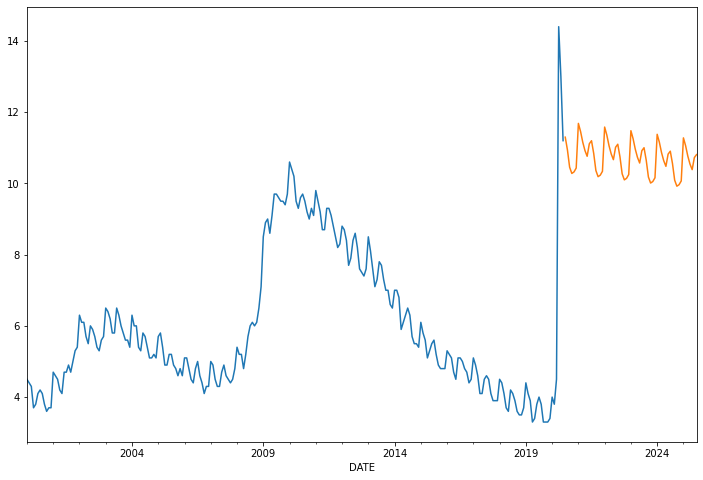

In [29]:
df["Unemployment"].plot(figsize=(12,8))
forecast_predictions.plot();